In [1]:
# Импорт модулей для работы
import os
import pickle

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from tabulate import tabulate

# Анализ данных

In [2]:
df1 = pd.read_excel('./X_bp.xlsx', index_col=0)
df2 = pd.read_excel('./X_nup.xlsx', index_col=0)
# Объединим данные в один датафрейм
df = df1.join(df2, how='inner')
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

Посмотрим на сводную информацию о столбцах в наборе данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Видим, что всего записей 1023 и в каждом столбце также 1023 значения, то есть пропусков и NaN значений нет. Фильтрация данных не нужна.

Выведем числовые характеристики для каждого признака, такие как:
* количество записей примеров
* среднее значение
* стандартное отклонение
* 25% квантиль
* 50% квантиль
* 75% квантиль
* минимальное значение
* максимальное значение

In [4]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

Гистограммы распределения каждой из переменных.

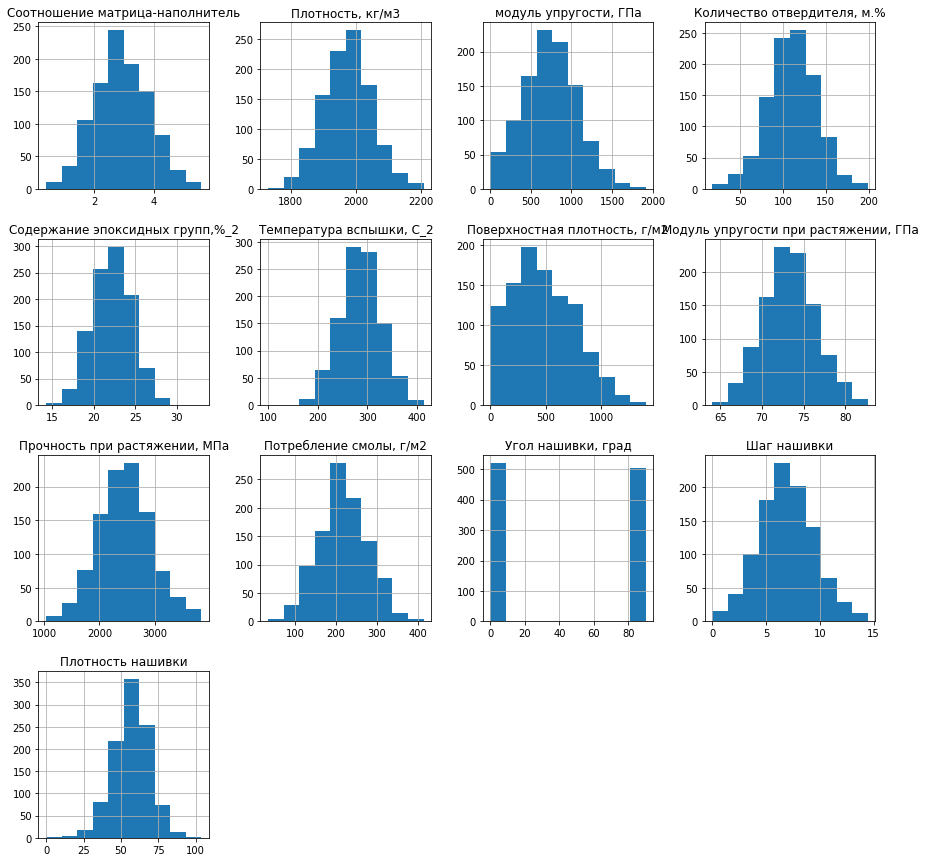

In [5]:
df.hist(figsize=(15, 15))
plt.show()

Попарные графики рассеяния точек

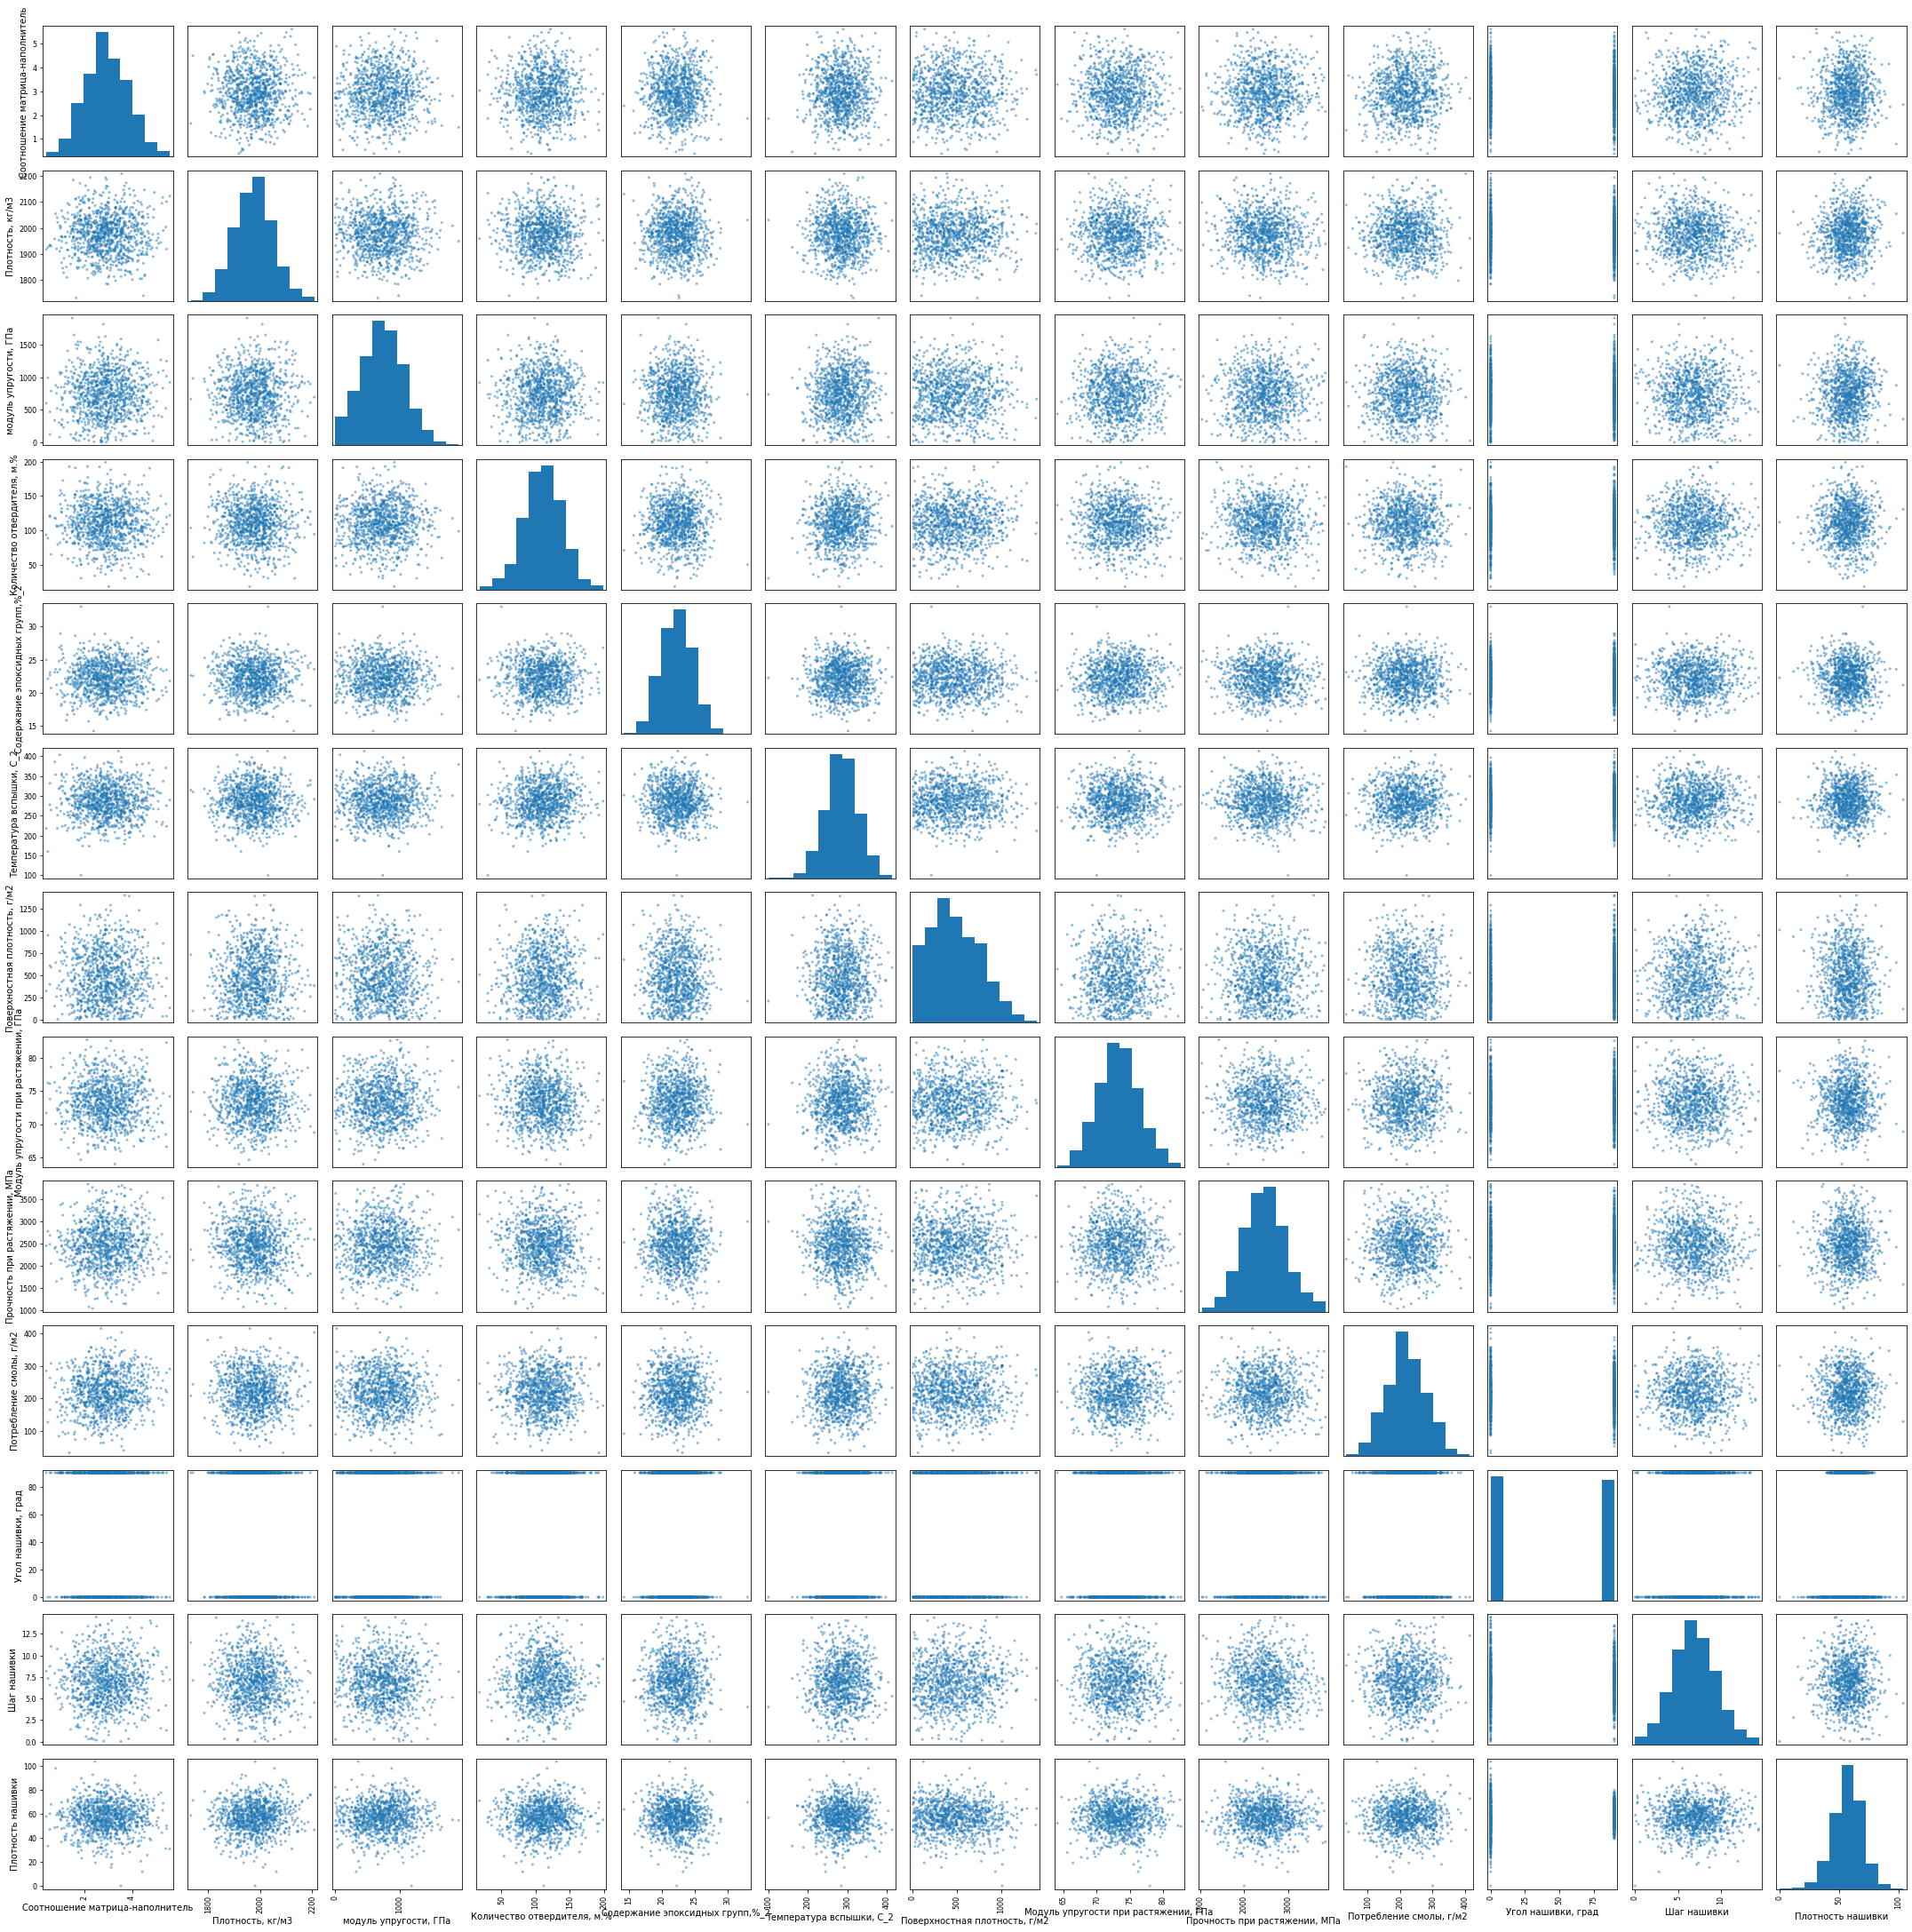

In [6]:
axes = pd.plotting.scatter_matrix(df, figsize=(30, 30))
plt.tight_layout()
plt.show()

Визуализируем выбросы для различных признаков с помощью диаграммы ящика с усами.

<Figure size 1080x1080 with 0 Axes>

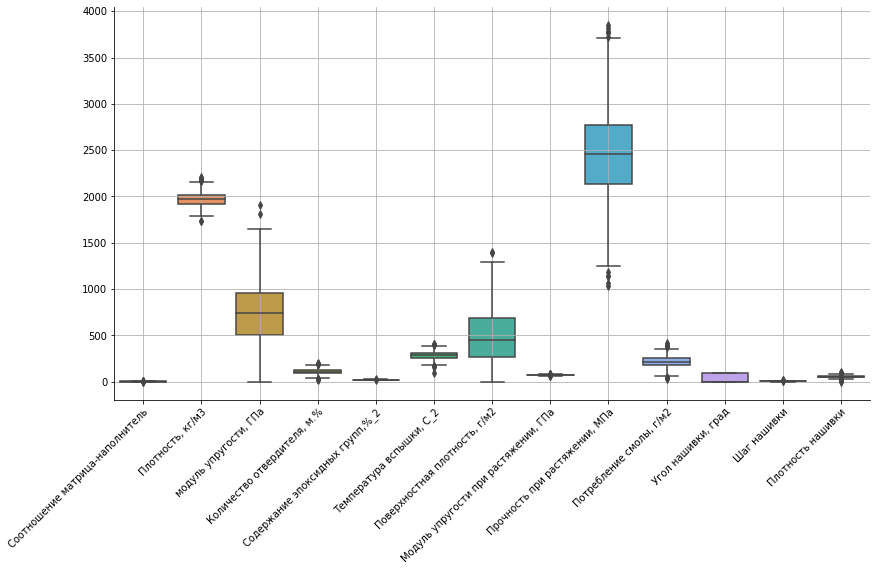

In [7]:
fig = plt.figure(figsize=(15, 15))
sns.catplot(data=df, kind='box', height=6, aspect=2)
plt.grid()
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

# Анализ и исключение выбросов

Данные имеют разный масштаб и некоторые признаки плохо видны на таком графике. Рассматрим их в зависимости от масштаба данных.

In [10]:
low_scale_columns = [
    'Соотношение матрица-наполнитель',
    'Содержание эпоксидных групп,%_2',
    'Модуль упругости при растяжении, ГПа',
    'Шаг нашивки',
    'Плотность нашивки'
]

<Figure size 720x720 with 0 Axes>

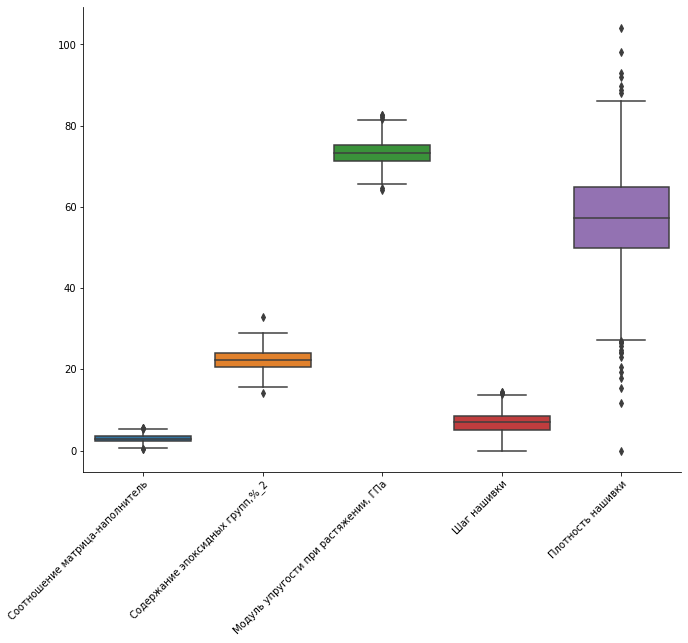

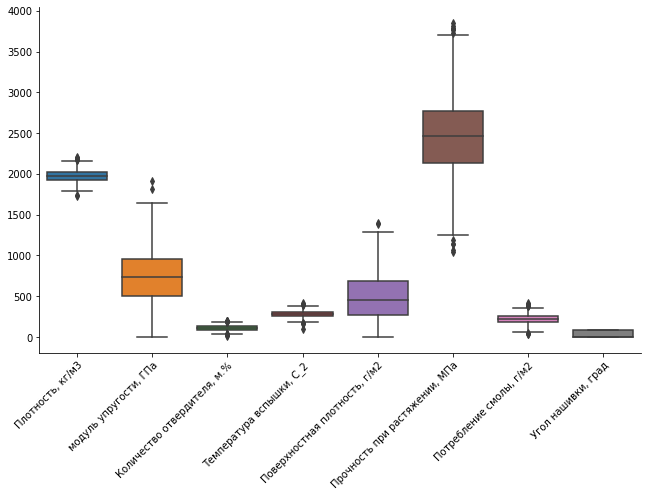

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(data=df[low_scale_columns], kind='box', height=7, aspect=1.3)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
sns.catplot(
    data=df[[c for c in df.columns if c not in low_scale_columns]],
    kind='box', height=7, aspect=1.3
)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

Для удаления выбросов будем использовать метод границ Тьюки

In [13]:
df_tmp = df.copy()
src_size = len(df)
for name in df.columns:
    q25 = df_tmp[name].describe()['25%']
    q75 = df_tmp[name].describe()['75%']
    # Интерквантльный размах
    iqr = q75 - q25
    condition1 = df_tmp[name] > (q25 - 1.5 * iqr)
    condition2 = df_tmp[name] < (q75 + 1.5 * iqr)
    df_tmp = df_tmp[condition1 & condition2]

In [15]:
print(f'Размер выборки измнился с {src_size} до {len(df_tmp)}')

Размер выборки измнился с 1023 до 932


In [16]:
df = df_tmp

<Figure size 1080x1080 with 0 Axes>

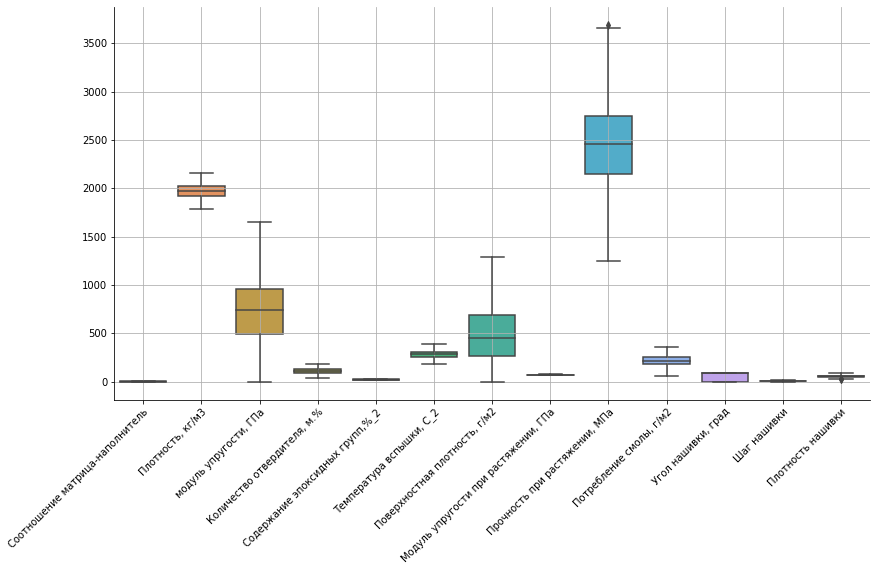

In [19]:
fig = plt.figure(figsize=(15, 15))
sns.catplot(data=df, kind='box', height=6, aspect=2)
plt.grid()
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

<Figure size 720x720 with 0 Axes>

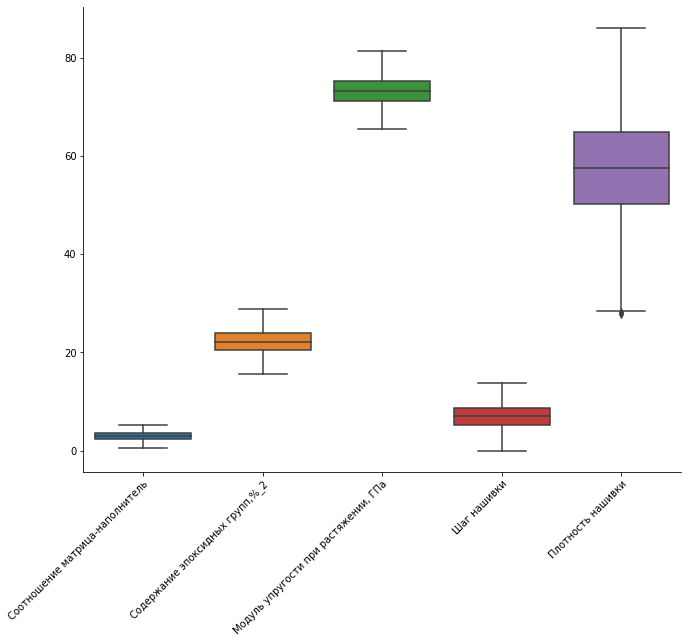

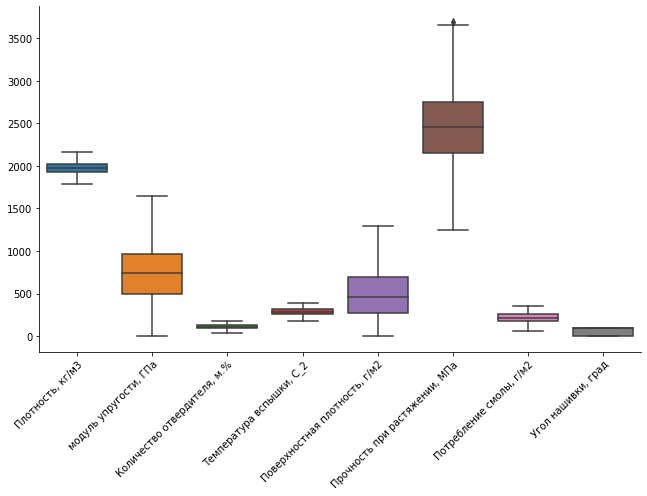

In [18]:
fig = plt.figure(figsize=(10, 10))
sns.catplot(data=df[low_scale_columns], kind='box', height=7, aspect=1.3)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
sns.catplot(
    data=df[[c for c in df.columns if c not in low_scale_columns]],
    kind='box', height=7, aspect=1.3
)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

Видим, что выбросы теперь отсутствуют.

Удалим признаки, имеющие сильную корреляцию. Для этого сперва посмотрим на коэффициенты корреляции целевых признаков (модуль упругости и прочность при растяжении) со всеми остальными.

In [20]:
df.corr()['Модуль упругости при растяжении, ГПа']

Соотношение матрица-наполнитель        -0.018588
Плотность, кг/м3                       -0.020846
модуль упругости, ГПа                   0.020730
Количество отвердителя, м.%            -0.050399
Содержание эпоксидных групп,%_2         0.054753
Температура вспышки, С_2                0.013920
Поверхностная плотность, г/м2           0.027589
Модуль упругости при растяжении, ГПа    1.000000
Прочность при растяжении, МПа          -0.003136
Потребление смолы, г/м2                 0.054394
Угол нашивки, град                      0.033863
Шаг нашивки                            -0.006500
Плотность нашивки                       0.015644
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [21]:
df.corr()['Прочность при растяжении, МПа']

Соотношение матрица-наполнитель         0.025437
Плотность, кг/м3                       -0.075065
модуль упругости, ГПа                   0.036741
Количество отвердителя, м.%            -0.059092
Содержание эпоксидных групп,%_2        -0.009652
Температура вспышки, С_2               -0.013127
Поверхностная плотность, г/м2          -0.027058
Модуль упругости при растяжении, ГПа   -0.003136
Прочность при растяжении, МПа           1.000000
Потребление смолы, г/м2                 0.034673
Угол нашивки, град                      0.008213
Шаг нашивки                            -0.056601
Плотность нашивки                       0.011517
Name: Прочность при растяжении, МПа, dtype: float64

Видим, что сильной корреляции не наблюдается. Визуализируем также попарную корреляцию всех признаков.

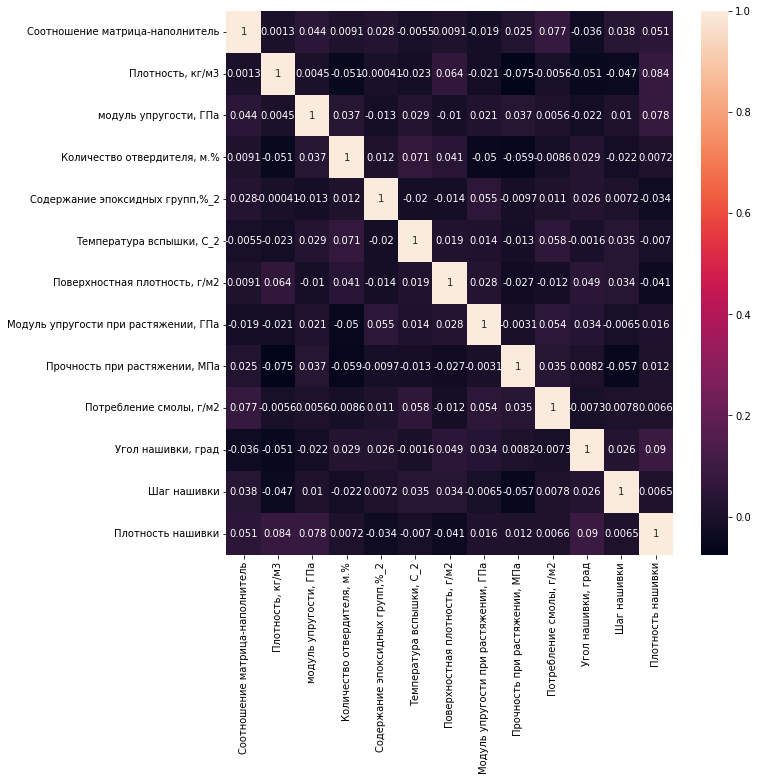

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Аналогично, сильной корреляции не наблюдается. Никакие столбцы не нуждаются в удалении.

# Предобработка данных

Для начала разделим признаки и целевые значения, которые нужно предсказать

In [23]:
x = df.drop(
    ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],
    axis=1
)
y1 = df['Модуль упругости при растяжении, ГПа']
y2 = df['Прочность при растяжении, МПа']

Получим обучающую и валидационную подвыборки, оставив для тестирования 30% данных.

In [24]:
train_x, test_x, train_y1, test_y1, train_y2, test_y2 = train_test_split(
    x, y1, y2, test_size=0.3
)
train_y1 = train_y1.to_numpy().reshape(-1, 1)
test_y1 = test_y1.to_numpy().reshape(-1, 1)
train_y2 = train_y2.to_numpy().reshape(-1, 1)
test_y2 = test_y2.to_numpy().reshape(-1, 1)

Выполним нормализацию признаков и целевых значений. Для этого используем StandardScaler из sklearn.

In [25]:
scaler_x = StandardScaler()
train_x_scaled = scaler_x.fit_transform(train_x)
test_x_scaled = scaler_x.transform(test_x)

scaler_y1 = StandardScaler()
train_y1_scaled = scaler_y1.fit_transform(train_y1)
test_y1_scaled = scaler_y1.transform(test_y1)

scaler_y2 = StandardScaler()
train_y2_scaled = scaler_y1.fit_transform(train_y2)
test_y2_scaled = scaler_y1.transform(test_y2)

Сравним среднее значение до нормировки и после

In [40]:
print(f"{'До':^17} | После")
for i in range(train_x.shape[1]):
    print(f'{train_x.iloc[:, i].mean():17.10f} | {train_x_scaled[:, i].mean()}')

       До         | После
     2.9443560509 | -1.7436631552395097e-16
  1974.7408789613 | 5.296376834040011e-15
   740.1286528175 | 1.4167263136321016e-16
   111.6702799308 | 9.399434196212982e-17
    22.2107295326 | -3.2693684160740805e-16
   284.9457215939 | 8.173421040185202e-16
   485.1796950460 | 2.506515785656795e-16
   216.9864880631 | 3.0309769690686787e-16
    46.1042944785 | 1.4984605240339536e-17
     6.9534588853 | -4.904052624111121e-16
    57.8649508295 | -1.0625447352240762e-16


# Обучение моделей для прогноза

Выполним поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой

In [131]:
# Подбор гиперпараметрв для моделей
hyperparams_svm = {
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'C': [1, 3, 5, 7],
}
hyperparams_rf = {
    'max_depth': list(range(1, 6)),
    'n_estimators': [20, 50, 100, 150],
    'min_samples_split': [2, 3]
}

# Словарь для удобной работы с моделями и их гипе
models = {
    'LinearRegression': (LinearRegression(), {}),
    'SVR': (SVR(), hyperparams_svm),
    'RandomForest': (RandomForestRegressor(), hyperparams_rf),
}

In [135]:
# Функция для обучения, поиска гиперпараметров и тестирования на валидационной выборке
def train_eval_model(model, hyperparams, x_train, y_train, x_test, y_test):
    cv_res = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error')
    cv_res.fit(x_train, y_train.ravel())
    y_pred = cv_res.best_estimator_.predict(x_test)
    return cv_res, mean_squared_error(y_test.ravel(), y_pred)

Предсказание **модуля упругости при растяжении**

In [137]:
for name, (model, hyperparams) in models.items():
    cv_res, mse = train_eval_model(
        model,
        hyperparams,
        train_x_scaled,
        train_y1_scaled,
        test_x_scaled,
        test_y1_scaled
    )
    print(f'Модель {name} показывает среднеквадратическую ошибку на валидации {mse:.5f}')
    print(f'Подобранные гиперпараметры: {cv_res.best_params_}\n')

Модель LinearRegression показывает среднеквадратическую ошибку на валидации 1.01098
Подобранные гиперпараметры: {}

Модель SVR показывает среднеквадратическую ошибку на валидации 1.15241
Подобранные гиперпараметры: {'C': 1, 'kernel': 'rbf'}

Модель RandomForest показывает среднеквадратическую ошибку на валидации 0.99150
Подобранные гиперпараметры: {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 100}



Наилучшие результат показала модель Random Forest.

Предсказание **прочности при растяжении**

In [138]:
for name, (model, hyperparams) in models.items():
    cv_res, mse = train_eval_model(
        model,
        hyperparams,
        train_x_scaled,
        train_y2_scaled,
        test_x_scaled,
        test_y2_scaled
    )
    print(f'Модель {name} показывает среднеквадратическую ошибку на валидации {mse:.5f}')
    print(f'Подобранные гиперпараметры: {cv_res.best_params_}\n')

Модель LinearRegression показывает среднеквадратическую ошибку на валидации 1.08264
Подобранные гиперпараметры: {}

Модель SVR показывает среднеквадратическую ошибку на валидации 1.15818
Подобранные гиперпараметры: {'C': 1, 'kernel': 'rbf'}

Модель RandomForest показывает среднеквадратическую ошибку на валидации 1.08746
Подобранные гиперпараметры: {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 150}



В случае с прочность при растяжении наибольшую точность (= наименьшую ошибку) показала модель  линейной регрессии. Но при этом ошибка у RandomForest отличается минимально, разница лиш в 3 знаке после запятой.

# Нейронная сеть, которая рекомендует соотношение матрица-наполнитель

Выполним аналогичные операции по подготовке данных к обучению

In [143]:
x = df.drop('Соотношение матрица-наполнитель', axis=1)
y = df['Соотношение матрица-наполнитель']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [144]:
# Масштабирование признаков
scaler_x = StandardScaler()
train_x_scaled = scaler_x.fit_transform(train_x)
test_x_scaled = scaler_x.transform(test_x)

In [145]:
# Масштабирование признаков
scaler_y = StandardScaler()
train_y_scaled = scaler_y.fit_transform(train_y.to_numpy().reshape(-1, 1))
test_y_scaled = scaler_y.transform(test_y.to_numpy().reshape(-1, 1))

In [147]:
input_size = train_x.shape[1]
print(f'Размерность входных данных: {input_size}')

Размерность входных данных: 12


In [151]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

Определим архитектуру сети. В данном случае она будет состоять из входного полносвязного слоя с количеством нейронов = 16 с функцией активации ReLU и выходного полносвязного слоя.

In [160]:
net = nn.Sequential(nn.Linear(input_size, 16),
                    nn.ReLU(), nn.Dropout(),
                    nn.Linear(16, 1)).to(device)

In [180]:
print(input_size)

12


In [161]:
optimizer = torch.optim.Adam(net.parameters())
criterion = nn.MSELoss()

In [162]:
EPOCHS = 50

for epoch in range(EPOCHS):
    
    net.train()
    x = torch.Tensor(train_x_scaled).to(device)
    labels = torch.Tensor(train_y_scaled).to(device)

    outputs = net(x)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    net.eval()
    with torch.no_grad():
        test_labels = torch.Tensor(test_y_scaled).to(device)
        x_test = torch.Tensor(test_x_scaled).to(device)
        pred_test = net(x_test)
        test_loss = criterion(pred_test, test_labels)

    print ('Epoch [{}/{}], Loss: {:.3f}, MSE test: {:.3f}'.format(
        epoch+1, num_epochs, loss.item(), test_loss.item()
    ))


Epoch [1/100], Loss: 1.145, MSE test: 0.966
Epoch [2/100], Loss: 1.135, MSE test: 0.962
Epoch [3/100], Loss: 1.105, MSE test: 0.959
Epoch [4/100], Loss: 1.105, MSE test: 0.955
Epoch [5/100], Loss: 1.113, MSE test: 0.952
Epoch [6/100], Loss: 1.105, MSE test: 0.949
Epoch [7/100], Loss: 1.145, MSE test: 0.946
Epoch [8/100], Loss: 1.087, MSE test: 0.943
Epoch [9/100], Loss: 1.089, MSE test: 0.940
Epoch [10/100], Loss: 1.098, MSE test: 0.938
Epoch [11/100], Loss: 1.080, MSE test: 0.935
Epoch [12/100], Loss: 1.079, MSE test: 0.933
Epoch [13/100], Loss: 1.118, MSE test: 0.930
Epoch [14/100], Loss: 1.075, MSE test: 0.928
Epoch [15/100], Loss: 1.086, MSE test: 0.925
Epoch [16/100], Loss: 1.084, MSE test: 0.923
Epoch [17/100], Loss: 1.076, MSE test: 0.921
Epoch [18/100], Loss: 1.049, MSE test: 0.919
Epoch [19/100], Loss: 1.067, MSE test: 0.917
Epoch [20/100], Loss: 1.061, MSE test: 0.916
Epoch [21/100], Loss: 1.060, MSE test: 0.914
Epoch [22/100], Loss: 1.038, MSE test: 0.913
Epoch [23/100], Los

Нейронная сеть обучилась предсказывать соотношение с среднеквадратичной ошибкой 0.893 на тестовом наборе данных

Выполним предсказание на тестовых данных и сделаем обратное масштабироание, чтобы оценить качество работы

In [175]:
net.eval()
with torch.no_grad():
    pred_src = net(torch.Tensor(test_x_scaled).to(device)).cpu().numpy()
    pred = scaler_y.inverse_transform(pred_src)

In [176]:
header = ['Правильное значение', 'Предсказанное значение']
rows = []
N = 10
for i in range(N):
    rows.append([f'{pred[i][0]:.3f}', f'{test_y.iloc[i]:.3f}'])
print(tabulate(rows, headers=header, tablefmt='github'))

|   Правильное значение |   Предсказанное значение |
|-----------------------|--------------------------|
|                 2.944 |                    3.364 |
|                 3.029 |                    3.118 |
|                 2.933 |                    2.547 |
|                 2.997 |                    3.488 |
|                 2.843 |                    1.721 |
|                 2.973 |                    4.11  |
|                 2.927 |                    1.498 |
|                 2.971 |                    3.567 |
|                 2.878 |                    2.275 |
|                 3.072 |                    2.595 |


Сохраним все объекты, которые потребуются для приложения

In [183]:
torch.save(net.state_dict(), 'net.pth')
with open('x_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_x, f)
with open('y_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)
test_x.to_csv('test_x.csv', index=False)